In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/finalproject/dataset.zip' -d '/content/drive/MyDrive/finalproject/data'

# Jigsaw dataset

In [3]:
import pandas as pd

jigsaw_bias = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\jigsaw-unintended-bias-in-toxicity-classification\\train.csv')
jigsaw_bias.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [9]:
import numpy as np

jigsaw_bias.target = np.where(jigsaw_bias.target >= 0.5, 1, 0)
jigsaw_bias = jigsaw_bias[['target', 'comment_text']]
jigsaw_bias

,target,comment_text
0,0,"This is so cool. It's like, 'would you want yo..."
1,0,Thank you!! This would make my life a lot less...
2,0,This is such an urgent design problem; kudos t...
3,0,Is this something I'll be able to install on m...
4,1,haha you guys are a bunch of losers.
...,...,...
1804869,0,"Maybe the tax on ""things"" would be collected w..."
1804870,0,What do you call people who STILL think the di...
1804871,0,"thank you ,,,right or wrong,,, i am following ..."
1804872,1,Anyone who is quoted as having the following e...


In [ ]:
for i,cmmt in enumerate(jigsaw_bias.comment_text):
    print(cmmt)
    if i == 10:
        break    

This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!
Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!
This is such an urgent design problem; kudos to you for taking it on. Very impressive!
Is this something I'll be able to install on my site? When will you be releasing it?
haha you guys are a bunch of losers.
ur a sh*tty comment.
hahahahahahahahhha suck it.
FFFFUUUUUUUUUUUUUUU
The ranchers seem motivated by mostly by greed; no one should have the right to allow their animals destroy public land.
It was a great show. Not a combo I'd of expected to be good together but it was.
Wow, that sounds great.


In [10]:
jigsaw_tar = jigsaw_bias[(jigsaw_bias.target == 1)]
jigsaw_tar

,target,comment_text
4,1,haha you guys are a bunch of losers.
5,1,ur a sh*tty comment.
13,1,It's ridiculous that these guys are being call...
14,1,This story gets more ridiculous by the hour! A...
19,1,"Angry trolls, misogynists and Racists"", oh my...."
...,...,...
1804825,1,Who is the jerk in the last row between the C ...
1804838,1,Nobody really cares that she supports the scie...
1804856,1,Believing in God or not believing in God are p...
1804857,1,"I take your point, but I think you're shooting..."


In [11]:
jigsaw_train = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\jigsaw_train.csv')
jigsaw_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [12]:
jigsaw_train = jigsaw_train[['comment_text','toxic']]
jigsaw_train = jigsaw_train.rename(columns={'toxic':'target'})
jigsaw = pd.concat([jigsaw_train,jigsaw_tar])

jigsaw

,comment_text,target
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
1804825,Who is the jerk in the last row between the C ...,1
1804838,Nobody really cares that she supports the scie...,1
1804856,Believing in God or not believing in God are p...,1
1804857,"I take your point, but I think you're shooting...",1


In [6]:
jigsaw.target.value_counts()

1    159628
0    144277
Name: target, dtype: int64

In [7]:
for comment in jigsaw.comment_text:
    if comment.startswith('['):
        print(comment)

[[User_Talk:King Lopez|Lopez]]Contribs
[www.us.terra.com/copa2006/esp/grandes/6251.html This] source appears to say 1968, not 1958. I'll adjust it to 16, accordingly. .
[name of possible attack site]
[Magician&Programmer;|Magician&Programmer;]Yes, why hurt someone greatly (the creator of the effect) and hurt all the performers as well, while not helping anyone?!?! DO YOU GET MONEY TO PUT THE METHOD THERE? That would be illegal! And if you don't, then why should you care?....
[added clarifications; the context is the July 2008 AN/I.   ]
[[Holly wing] 
This article was a  according to the criteria set out in WP:BIO. (aeropagitica)
[edit] Oh Man...you deserve it!!!
  The RickK Anti-Vandalism Barnstar 
For being one of the most consistent and accurate vandal-fighters I have seen here...ever Jmlk17
[Rilla] meaning Religious Inlightment language looping Audio. Definition: Urban people decodeing goverment propaganda Messages through Hiphop and Drum&bass; and other forms of music in moder day 

# GAP

![image.png](attachment:image.png)

In [36]:
import pandas as pd

gap = pd.read_csv('https://raw.githubusercontent.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/master/data/gab.csv')
gap.head(2)

,id,text,hate_speech_idx,response
0,1. 39869714\n,1. i joined gab to remind myself how retarded ...,[1],"[""Using words that insult one group while defe..."
1,1. 39845588\n2. \t39848775\n3. \t\t39911017\n,1. This is what the left is really scared of. ...,[3],['You can disagree with someones opinion witho...


In [9]:
c = 0
for t,i,r in zip(gap.text, gap.hate_speech_idx, gap.response):
    print('Text',t,'\nResponse:',r,'\nLabel:',i,'\n*****************************')
    c+=1
    if c == 5:
        break   

Text 1. i joined gab to remind myself how retarded jew haters are. You wouldn't be typing on your abacus without them you retard.
 
Response: ["Using words that insult one group while defending another group doesn't come across as helpful.", 'You can make the same point more effectively without the use of hateful terminology.', 'Use of the r-word is unacceptable in our discourse as it demeans and insults people with mental disabilities.'] 
Label: [1] 
*****************************
Text 1. This is what the left is really scared of.    https://redd.it/9rfkts
2. 	That literally looks like a monkey. Why are we supposed to pretend it’s a person bc it’s wearing a red hat? 
3. 		Dumb Cunt
 
Response: ['You can disagree with someones opinion without calling them names. Use reason and you might get more people on your side.', 'You can make the same point more effectively without the use of hateful terminology.', 'Use of the c-word is unacceptable in our discourse as it demeans and insults women

In [ ]:
gap.isnull().sum()

id                   0
text                 0
hate_speech_idx    656
response           656
dtype: int64

# Reddit

In [37]:
reddit = pd.read_csv('https://raw.githubusercontent.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/master/data/reddit.csv')
reddit.head(2)

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...


In [ ]:
i = 0
for t,r in zip(reddit.text, reddit.response):
    print(t,'\nResponse:',r,'\n*****************************')
    i+=1
    if i == 2:
        break   

1. A subsection of retarded Hungarians? Ohh boy. brace for a livid Bulbasaur coming in here trying to hate a hole in some of her stupider countrymen.
2. 	Hiii. Just got off work. 444 is mainly the typa guys you imagine writing for US stupid sites, but basically they just try to fit in with the Western European and US big city hipsters.   Rich kids from Budapest who feel they are brave journalistic heroes.  
3. 		wow i guess soyboys are the same in every country
4. 			Owen Benjamin's soyboy song goes for every country and that's why it's so amazing. 
 
Response: ["I don't see a reason why it's okay to insult others based on their ethnic background.", 'Language people. You can express your ire respectfully and we insist that you do so. Thank you.', 'Stop using mental impairments for insults on posts'] 
*****************************
1. > "y'all hear sumn?"  by all means I live in a small town rn (for work). 5k people here, originally a mining community. No one is protesting here. Nobody m

In [77]:
df = pd.concat([reddit,gap])
df = df[['text','hate_speech_idx']]
df.reset_index(drop=True, inplace=True)

df

,text,hate_speech_idx
0,1. A subsection of retarded Hungarians? Ohh bo...,[1]
1,"1. > ""y'all hear sumn?"" by all means I live i...",[3]
2,1. wouldn't the defenders or whatever they are...,NaN
3,1. Because the Japanese aren't retarded and kn...,[1]
4,1. That might be true if we didn't have an exa...,"[2, 3]"
...,...,...
16840,1. Remember this 3 months ago? The intern that...,[2]
16841,1. #Sweden's four major dailies aftonbladet.se...,[2]
16842,1. Satisfaction and justice\n2. \tBEST TRUMP I...,[3]
16843,1. Twitter BANNED me and reported me to the FB...,"[2, 3]"


In [78]:
org_len = len(df)
df = df.dropna()
print(df.isnull().sum())
print(f'Total {org_len - len(df)} datas were dropped')

text               0
hate_speech_idx    0
dtype: int64
Total 1829 datas were dropped


In [79]:
import re

df['target'] = df['hate_speech_idx'].apply(lambda x: re.findall('[0-9]+',x))
df['target'] = df['target'].apply(lambda x: list(map(int, x)))

<ipython-input-79-251b2450670c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['hate_speech_idx'].apply(lambda x: re.findall('[0-9]+',x))
<ipython-input-79-251b2450670c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].apply(lambda x: list(map(int, x)))


In [80]:
print(type(df.target[0]))
print(type(df.target[0][0]))

<class 'list'>
<class 'int'>


In [81]:
org_len = len(df)
df['target'] = df['target'].apply(lambda x: x if len(x) ==1 else np.NaN)
df = df.dropna()
print(f'total {org_len - len(df)} datas are dropped')

total 3099 datas are dropped


<ipython-input-81-c110550e657d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].apply(lambda x: x if len(x) ==1 else np.NaN)


In [86]:
cnt=0
for target, cmmt in zip(df.target, df.text):
    if 1 not in target:
        print('target:',target)
        print(cmmt)
        cnt+=1
    if cnt > 3:
        break

target: [3]
1. > "y'all hear sumn?"  by all means I live in a small town rn (for work). 5k people here, originally a mining community. No one is protesting here. Nobody mentioned the protest today. Nobody here cares, they're busy loving their family and working hard.  Thank god for the electoral college. Liberals think we don't matter. 
2. 	[removed]
3. 		ah a liberal has slipped in. you can tell because the first question asked was loaded and retarded.  >  What does "working hard" mean? Your political views get more validated by how much manual labour you put in?   where did I say that? and yes, of course you have no clue what "working hard" means. Few soyboys do.  > Based on your comment regarding the EC I guess you don't really think that 2 mil majority of people who voted for Hillary don't really matter.  I shouldn't have to explain to you the point of the EC. If you want to talk to someone who is more patient with you than I am, you can check out AskThe_Donald. 

target: [8]
1. Wh

In [15]:
max_label = 0

for i,l_list in enumerate(df.target):
    for label in l_list:
        if label > max_label:
            max_label = label
        elif label == max_label:
            print(i,max_label)

3 3
5 8
27 8
98 17
1097 20
1863 20
1939 20
2852 20
2889 20
3099 20
3311 20
3723 20
4338 20
4348 20
4413 20
7350 20
10058 20
12267 20
12680 20
13754 20


In [58]:
cmmt = []
for cnt, cmmts in enumerate(df.text):
    texts = []
    if len(cmmt) != cnt:
        print(cnt)
        break
    for i in range(1,22):
        try:
            text = cmmts.split(f'{i}. ')[1]
            text = text.split(f'{i+1}. ')[0]
            text = text.strip()
            texts.append(text) 
            
        except IndexError:
            cmmt.append(texts)
            if cnt == len(df.text)-1:
                print('Splitting all rows is finished')
            break

Splitting all rows is finished


In [61]:
df['cmmt_list'] = cmmt
data = df[['target','cmmt_list']]
data

,target,cmmt_list
0,[1],[A subsection of retarded Hungarians? Ohh boy....
3,[1],[Because the Japanese aren't retarded and know...
7,[1],"[Wow, this cunt is a fucking trip. Men give ou..."
8,[1],"[Listen to that wording in the ""article"" aka h..."
9,[2],[This is the same kind of bullshit reporting t...
...,...,...
16838,[2],"[A ""touching"" picture of Chelsea Handler and h..."
16839,[1],[Only a Demorat cocksucking pussy hating faggo...
16840,[2],[Remember this 3 months ago? The intern that y...
16841,[2],"[#Sweden's four major dailies aftonbladet.se, ..."


In [62]:
org_data = len(data)

for cmmt, labels in zip(data.cmmt_list, data.target):
    for i in range(0,len(cmmt)):
        if i+1 not in labels:
            data = data.append({'target':[0],'cmmt_list':[cmmt[i]]},ignore_index=True)
            
print(f'Total {len(data)-org_data} of non_toxic commets are added')

Total 8916 of non_toxic commets are added


In [ ]:
data.to_csv('/content/drive/MyDrive/finalproject/data/gap_reddit_2.csv')

In [34]:
import pandas as pd
import ast

data = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\gap_reddit_2.csv', index_col=0)
data['target'] = data['target'].apply(lambda x: ast.literal_eval(x))
data['cmmt_list'] = data['cmmt_list'].apply(lambda x: ast.literal_eval(x))
data['target'] = data['target'].apply(lambda x: list(map(int, x)))
data

,target,cmmt_list
0,[1],[A subsection of retarded Hungarians? Ohh boy....
1,[3],"[> ""y'all hear sumn?"" by all means I live in ..."
2,[1],[Because the Japanese aren't retarded and know...
3,"[2, 3]",[That might be true if we didn't have an examp...
4,[8],"[Why, what is the point of making all of that ..."
...,...,...
44208,[0],[Remember this 3 months ago? The intern that y...
44209,[0],"[#Sweden's four major dailies aftonbladet.se, ..."
44210,[0],[Satisfaction and justice]
44211,[0],[BEST TRUMP INSTANT KARMA EVER!]


In [65]:
for target, cmmt in zip(data.target, data.cmmt_list):
    if target == [2,3]:
        print(cmmt)

In [53]:
org_data = len(data)
i = 0
for cmmts, labels in zip(data.cmmt_list, data.target):
    cnt = 0
    for label in labels:
        #label == 1이면 한문장, 2면 0:1, 3이면 1:2, 2,3이면 
        if label != 0: 
            cmmt = cmmts[label-2:label]
            data = data.append({'target':[1], 'cmmt_list':cmmt}, ignore_index=True)
            cnt+=1
            if cnt == len(labels):
                data = data.drop(data.index[i])
                i-=1
        elif label == 0:
            cmmt = cmmts[:2]
            data = data.append({'target':[0], 'cmmt_list':cmmt}, ignore_index=True)
            data = data.drop(data.index[i])
            i-=1
    i+=1
            
print(f'Total {len(data)-org_data} of toxic commets are added')

Total 0 of toxic commets are added


In [47]:
data

,target,cmmt_list
1,[0],[Hiii. Just got off work. 444 is mainly the ty...
2,[0],[wow i guess soyboys are the same in every cou...
3,[0],[Owen Benjamin's soyboy song goes for every co...
4,[0],"[> ""y'all hear sumn?"" by all means I live in ..."
5,[0],[[removed]]
...,...,...
49066,[1],"[#Sweden's four major dailies aftonbladet.se, ..."
49067,[1],"[Satisfaction and justice, BEST TRUMP INSTANT ..."
49068,[1],[Twitter BANNED me and reported me to the FBI ...
49069,[1],[Twitter BANNED me and reported me to the FBI ...


In [31]:
data['target'] = data['target'].apply(lambda x: x[0])

data.target.unique()

array([0, 1], dtype=int64)

In [32]:
org_data = len(data)
i = 0
for cmmts in data.cmmt_list:
    if cmmts == ['removed'] or cmmts == [['removed']] or cmmts == ['[removed]']:
        data = data.drop(data.index[i])
        i-=1
    i+=1
        
print(f'Total {org_data-len(data)} of datas are deleted')

Total 63 of datas are deleted


In [11]:
data.target.value_counts()

0    29134
1    19873
Name: target, dtype: int64

In [33]:
import numpy as np

# target = data[(data.target == 1)]
# data = data[(data.target == 0)]

df = data.copy()
df['cmmt_list'] = df['cmmt_list'].apply(lambda x: x if len(x)<3 else np.NaN)
df = df.dropna()
df.target.value_counts()        

0    29134
1    12873
Name: target, dtype: int64

In [13]:
jigsaw = jigsaw.rename(columns={'comment_text':'cmmt_list'})
df = pd.concat([data,jigsaw])

df

,target,cmmt_list
1,0,[Hiii. Just got off work. 444 is mainly the ty...
2,0,[wow i guess soyboys are the same in every cou...
3,0,[Owen Benjamin's soyboy song goes for every co...
4,0,"[> ""y'all hear sumn?"" by all means I live in ..."
6,0,[Japan doesn't shy* away from a lot of things....
...,...,...
1804825,1,Who is the jerk in the last row between the C ...
1804838,1,Nobody really cares that she supports the scie...
1804856,1,Believing in God or not believing in God are p...
1804857,1,"I take your point, but I think you're shooting..."


In [52]:
df.target.value_counts()

1    179501
0    173411
Name: target, dtype: int64

In [31]:
df.to_csv('finaldata.csv', index=False)

# gao2018

In [5]:
import pandas as pd

gao = pd.read_json('https://raw.githubusercontent.com/sjtuprog/fox-news-comments/master/full-comments-u.json#', lines = True)
gao

,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,"Expect more and more women to be asking .. ""wh...",1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
2,German lawmakers approve 'no means no' rape la...,Groping people in public wasn't already illega...,0,,German lawmakers passed a bill Thursday that w...,californiamojo,,
3,German lawmakers approve 'no means no' rape la...,"Merkel, possible the only person in charge who...",1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,"They know very well, no means NO! They need to...",1,,German lawmakers passed a bill Thursday that w...,scientist,,
...,...,...,...,...,...,...,...,...
1523,Fury as feminist blames toddler alligator deat...,"No, 10000 Loose nuts off their meds!",1,,A white Chicago-based Social Justice Warrior w...,toorotten,,
1524,Fury as feminist blames toddler alligator deat...,Just another ugly leftist.,1,"True. Most leftists ,esp female leftists have ...",A white Chicago-based Social Justice Warrior w...,randwolf13,,
1525,Fury as feminist blames toddler alligator deat...,"True. Most leftists ,esp female leftists have ...",1,,A white Chicago-based Social Justice Warrior w...,creatingfalserealitiesleadstoinsanity,@randwolf13,Just another ugly leftist.
1526,Fury as feminist blames toddler alligator deat...,"First, lets get this straight: a white, gay ma...",1,,A white Chicago-based Social Justice Warrior w...,KhaosDominus,,


In [145]:
data = gao.groupby('title').sum()
sample = dict(zip(list(data.index), list(data['label'])))
sample

{'Black Lives Matter must rescind anti-Israel declaration': 33,
 'Confederate flag debate: Protecting hatred preserves freedom': 12,
 'First lady Obama takes swipe at Trump': 60,
 "Fury as feminist blames toddler alligator death on white 'entitlement'": 48,
 "German lawmakers approve 'no means no' rape law after Cologne assaults": 58,
 'ICE program failing to rid US of dangerous illegal immigrants, analysts say': 56,
 'Navy names ship after gay rights advocate Harvey Milk': 52,
 'States moving to restore work requirements for food stamp recipients': 35,
 'Supreme Court has spoken on affirmative action. Now, colleges should boost income diversity': 32,
 'Texas, 12 states to ask judge to stall Obama transgender bathroom order': 49}

In [168]:
target = gao[(gao.label == 0)]
gao = gao[(gao.label == 1)]
print('Before sampling:',gao.label.value_counts(),sep='\n')
cmmt = dict(zip(list(data.index), [0]*len(list(data.index))))

for i in range(len(target)):
    title = target.iloc[i]['title']
    if cmmt[title] < sample[title]:
        gao = gao.append({'title':target.iloc[i]['title'], 'text':target.iloc[i]['text'], 'label':target.iloc[i]['label']}, ignore_index=True)
        cmmt[title]+=1
        
print('-'*10)
print('After sampling:',gao.label.value_counts(),sep='\n')        

Before sampling:
1    435
Name: label, dtype: int64
----------
After sampling:
1    435
0    434
Name: label, dtype: int64


In [169]:
gao.groupby(['title','label']).count()

text  succ  meta  \
title                                              label                     
Black Lives Matter must rescind anti-Israel dec... 0        32     0     0   
                                                   1        33    33    33   
Confederate flag debate: Protecting hatred pres... 0        12     0     0   
                                                   1        12    12    12   
First lady Obama takes swipe at Trump              0        60     0     0   
                                                   1        60    60    60   
Fury as feminist blames toddler alligator death... 0        48     0     0   
                                                   1        48    48    48   
German lawmakers approve 'no means no' rape law... 0        58     0     0   
                                                   1        58    58    58   
ICE program failing to rid US of dangerous ille... 0        56     0     0   
                                                   1        56    56    56   
Navy names ship after gay rights advocate Harve... 0        52     0     0   
                                                   1        52    52    52   
States moving to restore work requirements for ... 0        35     0     0   
                                                   1        35    35    35   
Supreme Court has spoken on affirmative action.... 0        32     0     0   
                                                   1        32    32    32   
Texas, 12 states to ask judge to stall Obama tr... 0        49     0     0   
                                                   1        49    49    49   

                                                          user  mentions  prev  
title                                              label                        
Black Lives Matter must rescind anti-Israel dec... 0         0         0     0  
                                                   1        33        33    33  
Confederate flag debate: Protecting hatred pres... 0         0         0     0  
                                                   1        12        12    12  
First lady Obama takes swipe at Trump              0         0         0     0  
                                                   1        60        60    60  
Fury as feminist blames toddler alligator death... 0         0         0     0  
                                                   1        48        48    48  
German lawmakers approve 'no means no' rape law... 0         0         0     0  
                                                   1        58        58    58  
ICE program failing to rid US of dangerous ille... 0         0         0     0  
                                                   1        56        56    56  
Navy names ship after gay rights advocate Harve... 0         0         0     0  
                                                   1        52        52    52  
States moving to restore work requirements for ... 0         0         0     0  
                                                   1        35        35    35  
Supreme Court has spoken on affirmative action.... 0         0         0     0  
                                                   1        32        32    32  
Texas, 12 states to ask judge to stall Obama tr... 0         0         0     0  
                                                   1        49        49    49

In [6]:
gao = gao[['title','text','label']]

context = []

for title, text in zip(gao.title, gao.text):
    context.append([title,text])
    
gao['cmmt_list'] = context
gao = gao[['cmmt_list','label']]
gao = gao.rename(columns={'label':'target'})
gao

<ipython-input-6-b1d378475c80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gao['cmmt_list'] = context


,cmmt_list,target
0,[German lawmakers approve 'no means no' rape l...,1
1,[German lawmakers approve 'no means no' rape l...,1
2,[German lawmakers approve 'no means no' rape l...,0
3,[German lawmakers approve 'no means no' rape l...,1
4,[German lawmakers approve 'no means no' rape l...,1
...,...,...
1523,[Fury as feminist blames toddler alligator dea...,1
1524,[Fury as feminist blames toddler alligator dea...,1
1525,[Fury as feminist blames toddler alligator dea...,1
1526,[Fury as feminist blames toddler alligator dea...,1


In [7]:
# context = pd.concat([gao,data])

# context

,cmmt_list,target
0,[German lawmakers approve 'no means no' rape l...,1
1,[German lawmakers approve 'no means no' rape l...,1
2,[German lawmakers approve 'no means no' rape l...,0
3,[German lawmakers approve 'no means no' rape l...,1
4,[German lawmakers approve 'no means no' rape l...,1
...,...,...
49066,"[#Sweden's four major dailies aftonbladet.se, ...",1
49067,"[Satisfaction and justice, BEST TRUMP INSTANT ...",1
49068,[Twitter BANNED me and reported me to the FBI ...,1
49069,[Twitter BANNED me and reported me to the FBI ...,1


In [54]:
df_gao.target.value_counts()

1    179936
0    174504
Name: target, dtype: int64

In [89]:
df_gao.to_csv('finaldata_wgao.csv', index=False)

# Pan12

In [60]:
import xml.etree.ElementTree as ET

tree = ET.parse('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\pan12\\train\\training-corpus.xml')
root = tree.getroot()

root.tag

'conversations'

In [75]:
len(root[0])

62

In [ ]:
pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\pan12\\train\\training-corpus.xml')

In [87]:
root[0][8][2].text

'M here.  Just got home from weekend trip.  Tired.'

In [70]:
cmmts = []

for i in len(root):
    for i in len(root[i]):
        id = root[i][0][0].text
        text = root[i][0][2].text

'Hola.'

# data collection

In [89]:
dfs = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\combined.tsv', sep='\t')

dfs = dfs[(dfs.file_language == 'en')]
dfs.file_name.unique()

array(['ousidhoum2019en_with_stopwords.csv', 'ousidhoum2019en.csv',
       'davidson2017en.csv', 'gibert2018en.csv', 'gao2018en.csv',
       'qian2019en_gab.csv', 'qian2019en_reddit.csv', 'mandl2019en.csv',
       'mandl2019ger.csv', 'mandl2019hind.csv', 'bretschneider2017en.csv',
       'basile2019en.csv', 'wulczyn2017en_toxic.csv',
       'wulczyn2017en_aggressive.csv', 'wulczyn2017en_attack.csv',
       'zampieri2019en.csv', 'bretschneider2016en_wow.csv',
       'bretschneider2016en_lol.csv'], dtype=object)

In [104]:
files = ['ousidhoum2019en.csv', 'davidson2017en.csv', 'gibert2018en.csv',
       'gao2018en.csv', 'qian2019en_gab.csv', 'qian2019en_reddit.csv',
       'mandl2019en.csv', 'bretschneider2017en.csv', 'basile2019en.csv',
       'wulczyn2017en_toxic.csv', 'wulczyn2017en_aggressive.csv',
       'wulczyn2017en_attack.csv', 'zampieri2019en.csv',
       'bretschneider2016en_wow.csv', 'bretschneider2016en_lol.csv']

df = dfs[(dfs.file_name == files[0])]
df

,id,file_platform,file_language,file_name,text,labels
9000,0,twitter,en,ousidhoum2019en.csv,call sis im boy girl still faggot shut,"['offensive', 'indirect']"
9001,1,twitter,en,ousidhoum2019en.csv,@user @user legit nilas retarded idk,"['offensive', 'indirect', 'disrespectful']"
9002,2,twitter,en,ousidhoum2019en.csv,said retard @url,"['abusive', 'offensive', 'fearful', 'hate', 'i..."
9003,3,twitter,en,ousidhoum2019en.csv,america another 8 years obama's ideology via h...,"['abusive', 'fearful', 'none', 'disrespectful'..."
9004,4,twitter,en,ousidhoum2019en.csv,@user don... fucking made cry twat.,"['offensive', 'indirect']"
...,...,...,...,...,...,...
14642,5642,twitter,en,ousidhoum2019en.csv,@user @user retard :) x,"['direct', 'hate']"
14643,5643,twitter,en,ousidhoum2019en.csv,i'm hole sir i'm faggot sir i'm clit sir i'm h...,"['offensive', 'fearful', 'indirect']"
14644,5644,twitter,en,ousidhoum2019en.csv,(2/2) like fucking twat i'm damage heal you. r...,"['hate', 'indirect']"
14645,5645,twitter,en,ousidhoum2019en.csv,bf retarded guess u r 2,"['none', 'indirect']"


In [105]:
df.labels.unique()

array(["['offensive', 'indirect']",
       "['offensive', 'indirect', 'disrespectful']",
       "['abusive', 'offensive', 'fearful', 'hate', 'indirect']",
       "['abusive', 'fearful', 'none', 'disrespectful', 'hate', 'indirect']",
       "['direct', 'offensive']", "['none', 'indirect']",
       "['direct', 'hate', 'offensive']",
       "['hate', 'indirect', 'disrespectful']",
       "['hate', 'none', 'indirect']", "['direct', 'hate']",
       "['abusive', 'offensive', 'direct']",
       "['abusive', 'none', 'indirect']",
       "['offensive', 'indirect', 'none']",
       "['abusive', 'offensive', 'none', 'disrespectful', 'hate', 'indirect']",
       "['offensive', 'fearful', 'none', 'disrespectful', 'hate', 'indirect']",
       "['abusive', 'hate', 'indirect']",
       "['abusive', 'fearful', 'none', 'hate', 'indirect']",
       "['abusive', 'offensive', 'fearful', 'none', 'disrespectful', 'indirect']",
       "['hate', 'indirect']",
       "['abusive', 'offensive', 'fearful', 'disre

In [ ]:
df['cmmt_list'] = df['cmmt_list'].apply(lambda x: ast.literal_eval(x))

# Toxicity Detection: Does Context Really Matter?

In [171]:
gc = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\gc.csv')
gc

,id,text,parent,label,api
0,100030037.40314.40314,"BTW, I see no ""attack"" here. What I see is so...",I also feel its important for StuRat to have h...,0,0.1323
1,100104685.102437.102437,I realise... I just want to urge caution and a...,A main reason this project was started was to ...,0,0.0314
2,100189373.112824.112824,I should have stressed that this should be a t...,"I'd go for that. (By the way, not all deletion...",0,0.2229
3,100203140.40393.40393,Thanks to Lysy for shortening and copy editing...,(edit conflict with Piotrus) I agree with the...,0,0.0559
4,100214962.61084.61084,I like the additional info in the info box. I...,The larger box displays fine in Mozilla Firefo...,0,0.0539
...,...,...,...,...,...
9995,99779758.10078.10078,If you read the page www.apple.com/appletv/ yo...,"The name on Apple's site reads ""iPhone"". Sinc...",0,0.0721
9996,99818042.3681.3681,"I have had the impression that the name ""Hotei...","I think it is reasonable to refer to him as ""...",0,0.0709
9997,99855988.571.607,I redirected the article. After looking at th...,I think incidence of indirect taxation is redu...,0,0.0777
9998,99873404.2183.2183,No need to thank me. Sorry for losing my cool ...,"Well, sadly, I find maintaining the naming con...",0,0.0499


In [173]:
gc.label.value_counts()

0    9849
1     151
Name: label, dtype: int64

In [174]:
def sampling_func(data, n_sample):
    np.random.seed(10)
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

gc = gc.groupby('label', group_keys=False).apply(sampling_func, n_sample=151)
gc.label.value_counts()

1    151
0    151
Name: label, dtype: int64

In [112]:
data = gc[(gc.label == 1)]

i = 0
for q,a in zip(data.parent,data.text):
    if i > 10:
        break
    print('PARENT:\n',q)
    print('TEXT:\n',a)
    print('*'*10)
    i+=1

데이터들이 공격적이거나 나쁜 말들이 아닌데도 label이 1로 부여되어 있어 안쓰기로 결정

In [175]:
comments = []
for q,a in zip(gc.parent,gc.text):
    comments.append([q,a])

gc['cmmt_list'] = comments
gc = gc.rename(columns={'label':'target'})
gc = gc[['target','cmmt_list']]
context = pd.concat([gao,gc])

context

,cmmt_list,target
0,[German lawmakers approve 'no means no' rape l...,1
1,[German lawmakers approve 'no means no' rape l...,1
2,[German lawmakers approve 'no means no' rape l...,1
3,[German lawmakers approve 'no means no' rape l...,1
4,[German lawmakers approve 'no means no' rape l...,1
...,...,...
6784,[Take it to the talk page. This isn't the venu...,1
3976,"[N-E-T-T-O Netto is the place to go, shop all ...",1
838,[PS Thomas McPherson Brown article lacks suita...,1
7832,"[All of his arguements are nail perfect, you'r...",1


In [176]:
context.target.value_counts()

1    586
0    585
Name: target, dtype: int64

# Sexual tweet

In [177]:
sa = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\sexual_Cleaned_tweets.csv')
sa

,Unnamed: 0,Unnamed: 0.1,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1150,1150,brotherfucker,sheri79923585,1.330000e+18,08-11-2020 23:22,2,NaN,NaN,0.0,If Lauren is t suggesting to deport this gross...,NaN,NaN,NaN
1,1867,1867,Aroused,schwyhart,1.330000e+18,10-11-2020 18:18,4,NaN,NaN,1.0,"F in the chat for Corbin, he’s clearly constan...",NaN,NaN,NaN
2,3883,1575,hoe,Naambo11s,1.326780e+18,2020-11-12 06:51:53,0,NaN,NaN,0.0,"Congratulations to Thando and his fiancÃ©, let...",NaN,NaN,NaN
3,1026,1026,boobies,MoonSLullabies,1.330000e+18,11-11-2020 07:41,0,NaN,NaN,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...,NaN,NaN,NaN
4,320,320,ass cowboy,olivialynnfahey,1.330000e+18,10-11-2020 01:33,3,NaN,NaN,0.0,"Before anyone says anything, I am gonna get a ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,3615,3615,fucked,thatboylsu,1.330000e+18,11-11-2020 15:33,0,NaN,NaN,0.0,what ab when we fucked😩,NaN,NaN,NaN
4568,2810,2810,cock suck,W44864,1.330000e+18,11-11-2020 08:19,1,NaN,NaN,1.0,"Also,i think you should go now. Daddy Sony wan...",NaN,NaN,NaN
4569,2693,2693,Buttfuck,Flatchestbones,1.330000e+18,11-11-2020 01:50,6,NaN,NaN,1.0,Me and him buttfuck on the daily btw,NaN,NaN,NaN
4570,1096,1096,Breast Job,WilliamNaughto3,1.330000e+18,10-11-2020 13:25,2,NaN,NaN,0.0,that's their job or are they still on the brea...,NaN,NaN,NaN


In [121]:
data = sa[(sa['Unnamed: 9'].notnull())]
data

,Unnamed: 0,Unnamed: 0.1,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
127,3571,3571,whore,tenyams,1.330000e+18,12-11-2020 19:28,0,NaN,NaN,1.0,"yes compliment me I'm an attention whore, yeah...",yeah,mental problems. I'm sorry you're having prob...,NaN
1874,2992,2992,eat pussy,Zipology_YT,1.330000e+18,11-11-2020 10:38,0,NaN,NaN,1.0,"Lowkey tried to eat this pussy eat pussy,irina...",he wanna eat me,he be actin' up,"he always tryna…"""
2043,3281,3281,pu55y,onikasbible,1.330000e+18,08-11-2020 00:20,0,NaN,NaN,1.0,"suck my pu55y asff, you puss.""","you puss.""",NaN,NaN
2955,2119,2119,ass,princess_esmeg,1.330000e+18,11-11-2020 06:56,0,NaN,NaN,1.0,Subscribe for content dedicated to my hot body...,"bitch…""",NaN,NaN
4095,2971,2971,Dick Licker,clintmcduncan,1.330000e+18,09-11-2020 21:36,0,NaN,NaN,1.0,They had to stop Fucken staffers so they start...,suck a titty,"dick hole) somethings wrong w/ me😂""",NaN


In [178]:
sa['Text'][127] = sa['Text'][127] + ', ' + sa['Unnamed: 9'][127] + ', '  + sa['Unnamed: 10'][127]
sa['Text'][1874] = sa['Text'][1874] + ', ' + sa['Unnamed: 9'][1874] + ', '  + sa['Unnamed: 10'][1874] + ', '  + sa['Unnamed: 11'][1874]
sa['Text'][2043] = sa['Text'][2043] + ', ' + sa['Unnamed: 9'][2043] 
sa['Text'][2955] = sa['Text'][2955] + ', ' + sa['Unnamed: 9'][2955]
sa['Text'][4095] = sa['Text'][4095] + ', ' + sa['Unnamed: 9'][4095] + ', '  + sa['Unnamed: 10'][4095]

data = sa[(sa['Unnamed: 10'].notnull())]
data

<ipython-input-178-0d087e9e2cac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['Text'][127] = sa['Text'][127] + ', ' + sa['Unnamed: 9'][127] + ', '  + sa['Unnamed: 10'][127]
<ipython-input-178-0d087e9e2cac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['Text'][1874] = sa['Text'][1874] + ', ' + sa['Unnamed: 9'][1874] + ', '  + sa['Unnamed: 10'][1874] + ', '  + sa['Unnamed: 11'][1874]
<ipython-input-178-0d087e9e2cac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Unnamed: 0,Unnamed: 0.1,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
127,3571,3571,whore,tenyams,1.330000e+18,12-11-2020 19:28,0,NaN,NaN,1.0,"yes compliment me I'm an attention whore, yeah...",yeah,mental problems. I'm sorry you're having prob...,NaN
1874,2992,2992,eat pussy,Zipology_YT,1.330000e+18,11-11-2020 10:38,0,NaN,NaN,1.0,"Lowkey tried to eat this pussy eat pussy,irina...",he wanna eat me,he be actin' up,"he always tryna…"""
2664,2362,2362,big butt,sheabuttersidy,1.330000e+18,11-11-2020 06:37,0,NaN,NaN,1.0,"""Big titties, big butt too"" 🦄",NaN,1,NaN
4095,2971,2971,Dick Licker,clintmcduncan,1.330000e+18,09-11-2020 21:36,0,NaN,NaN,1.0,They had to stop Fucken staffers so they start...,suck a titty,"dick hole) somethings wrong w/ me😂""",NaN


In [179]:
sa = sa.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1)
sa = sa[['Label','Text']]
sa = sa.rename(columns={'Label':'target','Text':'cmmt_list'})

sa

,target,cmmt_list
0,0.0,If Lauren is t suggesting to deport this gross...
1,1.0,"F in the chat for Corbin, he’s clearly constan..."
2,0.0,"Congratulations to Thando and his fiancÃ©, let..."
3,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...
4,0.0,"Before anyone says anything, I am gonna get a ..."
...,...,...
4567,0.0,what ab when we fucked😩
4568,1.0,"Also,i think you should go now. Daddy Sony wan..."
4569,1.0,Me and him buttfuck on the daily btw
4570,0.0,that's their job or are they still on the brea...


In [16]:
sa.target.value_counts()

1.0    2423
0.0    2149
Name: target, dtype: int64

In [139]:
i = 0
for label, cmmt in zip(sa.target, sa.cmmt_list):
    if label == 1 and i > 70 and i < 101:
        print(i, cmmt)
    elif label > 100:
        break
    i+=1

71 “ Tomorrow isn’t promised.. eat her pussy today “
72 If my energy alone doesn’t get you aroused then I ain’t the one for you.
73 You had me at boobies but, booty...
78 dude I am both aroused and terrigyied
79 Washington man allegedly called himself â€˜pervyguy40â€™ online. Feds say he planned Bay Area trip to molest kids of unâ€¦
82 nawwhhh I miss her cute ass 😭
84 I see some trump jiz on your lip.
86 Its nice having that friend that wants to fuck you so bad even though she’s a girl and you’re gay.
87 I need a pretty ass bitch sucking my balls
90 I scared, and aroused, and scared that I’m aroused.
92 Mgmt’s new album makes my clit hard 🥵🥺
93 do me a favour. Get off my Dick. In lower terms: please Keep my black genitals out of your mouthâ€¦
94 Why the fuck did Microsoft flash me with a nutsack.
97 if u know what's good for u, u will, naughty slut
100 I kin Nishitani because I can't see Majima and not be aroused


1,6, 10, 18, 19, 30, 40, 41, 42, 50, 42, 54, 63, 70, 78, 82, 90, 94
drop 29, 79

In [180]:
idx = [1, 6, 10, 18, 19, 30, 40, 41, 42, 50, 42, 54, 63, 70, 78, 82, 90, 94]

for i in idx:
    sa['target'][i] = 0

sa = sa.drop(sa.index[29])
sa[77:80]

<ipython-input-180-f5a2f150053e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['target'][i] = 0


,target,cmmt_list
78,0.0,dude I am both aroused and terrigyied
79,1.0,Washington man allegedly called himself â€˜per...
80,0.0,“Be wary of friends—they will betray you more ...


In [181]:
sa['cmmt_list'] = sa['cmmt_list'].apply(lambda x: ['hi',x])
sa

,target,cmmt_list
0,0.0,"[hi, If Lauren is t suggesting to deport this ..."
1,0.0,"[hi, F in the chat for Corbin, he’s clearly co..."
2,0.0,"[hi, Congratulations to Thando and his fiancÃ©..."
3,0.0,"[hi, if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ..."
4,0.0,"[hi, Before anyone says anything, I am gonna g..."
...,...,...
4567,0.0,"[hi, what ab when we fucked😩]"
4568,1.0,"[hi, Also,i think you should go now. Daddy Son..."
4569,1.0,"[hi, Me and him buttfuck on the daily btw]"
4570,0.0,"[hi, that's their job or are they still on the..."


In [183]:
context = pd.concat([sa, context])
context

,target,cmmt_list
0,0.0,"[hi, If Lauren is t suggesting to deport this ..."
1,0.0,"[hi, F in the chat for Corbin, he’s clearly co..."
2,0.0,"[hi, Congratulations to Thando and his fiancÃ©..."
3,0.0,"[hi, if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ..."
4,0.0,"[hi, Before anyone says anything, I am gonna g..."
...,...,...
6784,1.0,[Take it to the talk page. This isn't the venu...
3976,1.0,"[N-E-T-T-O Netto is the place to go, shop all ..."
838,1.0,[PS Thomas McPherson Brown article lacks suita...
7832,1.0,"[All of his arguements are nail perfect, you'r..."


In [185]:
context.target.value_counts()

1.0    2991
0.0    2751
Name: target, dtype: int64

In [22]:
ver1 = pd.concat([sa,df])
ver1 = ver1.dropna()
ver1 = ver1.reset_index(drop=True)

ver1

,target,cmmt_list
0,0.0,If Lauren is t suggesting to deport this gross...
1,0.0,"F in the chat for Corbin, he’s clearly constan..."
2,0.0,"Congratulations to Thando and his fiancÃ©, let..."
3,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...
4,0.0,"Before anyone says anything, I am gonna get a ..."
...,...,...
357477,1.0,Who is the jerk in the last row between the C ...
357478,1.0,Nobody really cares that she supports the scie...
357479,1.0,Believing in God or not believing in God are p...
357480,1.0,"I take your point, but I think you're shooting..."


In [148]:
df.to_csv('finaldata.csv', index=False)

df_gao = pd.concat([sa,df_gao])
df_gao.to_csv('finaldata_wgao.csv', index=False)

df_gao

,index,target,cmmt_list
0,0.0,0.0,If Lauren is t suggesting to deport this gross...
1,1.0,0.0,"F in the chat for Corbin, he’s clearly constan..."
2,2.0,0.0,"Congratulations to Thando and his fiancÃ©, let..."
3,3.0,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...
4,4.0,0.0,"Before anyone says anything, I am gonna get a ..."
...,...,...,...
1804825,NaN,1.0,Who is the jerk in the last row between the C ...
1804838,NaN,1.0,Nobody really cares that she supports the scie...
1804856,NaN,1.0,Believing in God or not believing in God are p...
1804857,NaN,1.0,"I take your point, but I think you're shooting..."


# Questions

In [194]:
q = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\question\\train.csv')
q

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [196]:
def sampling_func(data, n_sample):
    np.random.seed(10)
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

q = q.groupby('target', group_keys=False).apply(sampling_func, n_sample=8000)
q.target.value_counts()

1    8000
0    8000
Name: target, dtype: int64

In [198]:
q['cmmt_list'] = q['question_text'].apply(lambda x : [x,'i have never think about that'])
q = q[['target','cmmt_list']]
context = pd.concat([q,context])
context.target.value_counts()

1.0    12961
0.0    12721
Name: target, dtype: int64

# Racism

In [186]:
racism = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\twitter_racism_parsed_dataset.csv')
racism

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0
...,...,...,...,...,...
13466,5.755964e+17,5.755964e+17,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,none,0
13467,5.580631e+17,5.580631e+17,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,none,0
13468,5.755969e+17,5.755969e+17,Glad the proper competition is starting and ev...,none,0
13469,5.755990e+17,5.755990e+17,"No worries Pete and Manu, take all the time of...",none,0


In [187]:
racism.oh_label.value_counts()

0    11501
1     1970
Name: oh_label, dtype: int64

In [189]:
def sampling_func(data, n_sample):
    np.random.seed(10)
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

racism = racism.groupby('oh_label', group_keys=False).apply(sampling_func, n_sample=1970)
racism.oh_label.value_counts()

1    1970
0    1970
Name: oh_label, dtype: int64

In [191]:
racism['Text'] = racism['Text'].apply(lambda x : ['how do you think of them?',x])
racism = racism[['Text','oh_label']]
racism = racism.rename(columns={'oh_label':'target','Text':'cmmt_list'})

context = pd.concat([racism,context])
context

,cmmt_list,target
7679,"[how do you think of them?, Now that the world...",0.0
8868,"[how do you think of them?, @srhbutts wait. Wh...",0.0
2935,"[how do you think of them?, @JoeHoganCornwal ""...",0.0
10492,"[how do you think of them?, RT @GodlessUtopia:...",0.0
1927,"[how do you think of them?, Lets get these spa...",0.0
...,...,...
6784,[Take it to the talk page. This isn't the venu...,1.0
3976,"[N-E-T-T-O Netto is the place to go, shop all ...",1.0
838,[PS Thomas McPherson Brown article lacks suita...,1.0
7832,"[All of his arguements are nail perfect, you'r...",1.0


# Preprocessing

## Ver1. Use pronoun, swearing

In [8]:
import re
import unicodedata

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub(' f ', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    cnt=0
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        cnt+=1
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [79]:
import time

start = time.time()
ver1['cleaned_comment'] = ver1['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')

Preprocessing is finished: 89.42 secs are taken


In [99]:
org_len = len(ver1)
ver1 = ver1[(ver1.cleaned_comment != '')]
print(f'Total {org_len-len(ver1)} of datas are removed')

Total 1049 of datas are removed


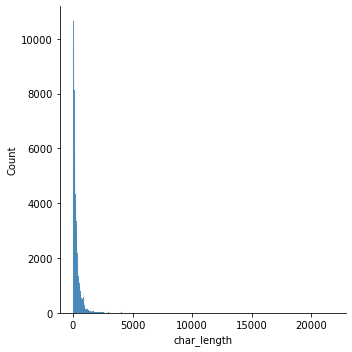

In [81]:
import seaborn as sns

ver1['char_length'] = ver1['cleaned_comment'].apply(lambda x: len(str(x)))

sns.displot(ver1['char_length']);

In [100]:
ver1_trim = ver1[(ver1.char_length <= 512)]
ver1_trim = ver1_trim[['target','cleaned_comment']]

ver1_trim.to_csv('finaldata.csv', index=False)
print(len(ver1_trim))
print(ver1_trim['target'].value_counts())

301001
1.0    155565
0.0    145436
Name: target, dtype: int64


## Ver2. lemmatizing & change some target words to token

In [23]:
!pip install -U nltk

Requirement already up-to-date: nltk in c:\users\user\anaconda3\lib\site-packages (3.6.2)


In [23]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

text = 'FUCKing you bitches'
text = text.lower().split()
text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
text

'fuck you bitch'

In [24]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
target = ['gay', 'gays', 'homosexual', 'lesbian', 'LGBT', 'moslem', 'muslim', 'jew', 'jews' 'blacks', 'nigga', 'niggas']

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = [w for w in text.split() if len(w)>1] #remove single alphabet in the sentence
    text = [w if w not in target else '[TARGET]' for w in text]
    text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [25]:
import time

start = time.time()
ver2 = ver1.copy()
ver2['cleaned_comment'] = ver2['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')

Preprocessing is finished: 1515.28 secs are taken


In [41]:
org_len = len(ver2)
ver2 = ver2[(ver2.cleaned_comment != '')]
print(f'Total {org_len-len(ver2)} of datas are removed')

Total 1088 of datas are removed


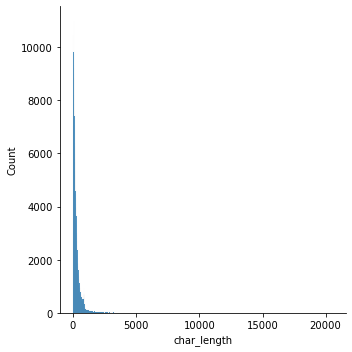

In [28]:
import seaborn as sns

ver2['char_length'] = ver2['cleaned_comment'].apply(lambda x: len(str(x)))

sns.displot(ver2['char_length']);

In [42]:
ver2_trim = ver2[(ver2.char_length <= 512)]
ver2_trim = ver2_trim[['target','cleaned_comment']]

ver2_trim.to_csv('finaldata_ver2.csv', index=False)
print(len(ver2_trim))
print(ver2_trim['target'].value_counts())

304850
1.0    157637
0.0    147213
Name: target, dtype: int64


## Ver3. Context dataset

In [224]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
target = ['gay', 'gays', 'homosexual', 'lesbian', 'LGBT', 'moslem', 'muslim', 'jew', 'jews' 'blacks', 'nigga', 'niggas']

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = [w for w in text.split() if len(w)>1] #remove single alphabet in the sentence
    text = [w if w not in target else '[TARGET]' for w in text]
    text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

removed_data = ['removed','[removed]',['removed'],'deleted','[deleted]',['deleted']]

def preprocessing(comment):
    try:
        if type(comment) == str:
            return clean_text(comment)
        elif type(comment) == list:
            global cnt
            cnt+=1
            comments = []
            for text in comment:
                if text in removed_data:
                    print('deleted removed data')
                    continue
                text = clean_text(text)
                comments.append(text)
            return comments
        else:
            print(type(comment))
    except:
        print(comment)

In [225]:
import time

cnt=0
start = time.time()
context['cleaned_comment'] = context['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')
print(f'Total {cnt} lists are cleaned')

Preprocessing is finished: 109.16 secs are taken
Total 25681 lists are cleaned


In [226]:
context = context.dropna()
context.target.value_counts()

1.0    12961
0.0    12720
Name: target, dtype: int64

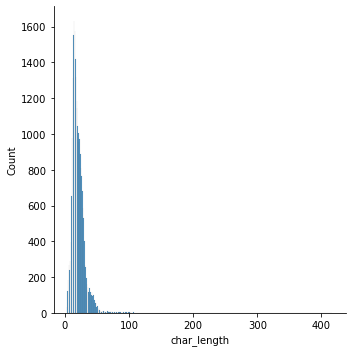

In [227]:
import seaborn as sns

context['char_length'] = context['cleaned_comment'].apply(lambda x: len(' [SEP] '.join(x).split()))

sns.displot(context['char_length']);

In [228]:
context_trim = context[['target','cleaned_comment']]
context_trim.to_csv('context.csv', index=False)
print(len(context_trim))
print(context_trim['target'].value_counts())

25681
1.0    12961
0.0    12720
Name: target, dtype: int64


## Test dataset

In [7]:
gao = gao.rename(columns={'label':'target'})
test = gao[['target','cmmt_list']]

test

,target,cmmt_list
0,1,[German lawmakers approve 'no means no' rape l...
1,1,[German lawmakers approve 'no means no' rape l...
2,0,[German lawmakers approve 'no means no' rape l...
3,1,[German lawmakers approve 'no means no' rape l...
4,1,[German lawmakers approve 'no means no' rape l...
...,...,...
1523,1,[Fury as feminist blames toddler alligator dea...
1524,1,[Fury as feminist blames toddler alligator dea...
1525,1,[Fury as feminist blames toddler alligator dea...
1526,1,[Fury as feminist blames toddler alligator dea...


In [38]:
import re
import unicodedata

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub(' f ', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    cnt=0
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        cnt+=1
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [8]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
target = ['gay', 'gays', 'homosexual', 'lesbian', 'LGBT', 'moslem', 'muslim', 'jew', 'jews' 'blacks', 'nigga', 'niggas']

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = [w for w in text.split() if len(w)>1] #remove single alphabet in the sentence
    text = [w if w not in target else '[TARGET]' for w in text]
    text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [9]:
import time

start = time.time()
test['cleaned_comment'] = test['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')

Preprocessing is finished: 7.70 secs are taken


<ipython-input-9-afcfad48df11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cleaned_comment'] = test['cmmt_list'].apply(lambda x: preprocessing(x))


In [10]:
org_len = len(test)
test = test[(test.cleaned_comment != '')]
print(f'Total {org_len-len(test)} of datas are removed')

Total 0 of datas are removed


In [12]:
test['char_length'] = test['cleaned_comment'].apply(lambda x: len(str(x)))
test_trim = test[(test.char_length <= 512)]
test_trim = test_trim[['target','cleaned_comment']]

test_trim.to_csv('test_ver2.csv', index=False)
print(len(test_trim))
print(test_trim['target'].value_counts())

1456
0    1054
1     402
Name: target, dtype: int64


# 